<a href="https://colab.research.google.com/github/Arish005/market-sentiment-analysis-arish/blob/main/Market_Sentiment_Impact_on_Trader_Performance_(Fear_vs_Greed).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


hist_url = 'https://drive.google.com/file/d/1apGVzTAbGDMHS8UVXIkwjcSswp_7_BU5/view?usp=drive_link'
trader_df = pd.read_csv("/content/historical_data.csv")

fg_url = 'https://drive.google.com/file/d/1A8iE06VHKyiAiFjWFKxk_rPJDOl8P-FY/view?usp=drive_link'
sentiment_df = pd.read_csv("/content/fear_greed_index.csv")

print("Trader Data:")
print(trader_df.head())

print("Sentiment Data:")
print(sentiment_df.head())



Trader Data:
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107             7.98   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107             7.98   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107             7.99   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107             7.99   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107             7.99   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50            0.00       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50          986.52       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50         1002.52       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50         1146.56       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50         1289.49       Buy   

   Closed PnL                                   Transaction Hash     Order ID  \
0        0

In [ ]:

trader_df['Timestamp IST'] = pd.to_datetime(trader_df['Timestamp IST'], format="%d-%m-%Y %H:%M")
trader_df['trade_date'] = trader_df['Timestamp IST'].dt.date


sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])
sentiment_df['sentiment_date'] = sentiment_df['date'].dt.date

merged_df = pd.merge(trader_df, sentiment_df[['sentiment_date', 'classification']],
                     left_on='trade_date', right_on='sentiment_date', how='left')

merged_df.drop(columns=['sentiment_date'], inplace=True)


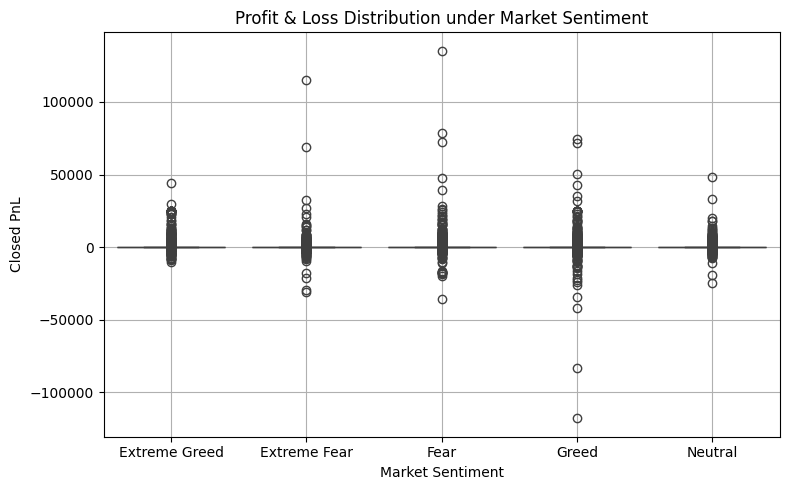

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='classification', y='Closed PnL', data=merged_df)
plt.title('Profit & Loss Distribution under Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Closed PnL')
plt.grid(True)
plt.tight_layout()
plt.show()


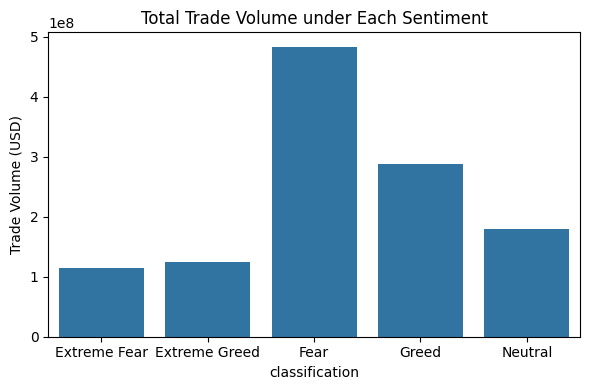

In [ ]:
volume_df = merged_df.groupby('classification')['Size USD'].sum().reset_index()
plt.figure(figsize=(6,4))
sns.barplot(x='classification', y='Size USD', data=volume_df)
plt.title('Total Trade Volume under Each Sentiment')
plt.ylabel('Trade Volume (USD)')
plt.tight_layout()
plt.show()


In [ ]:
stats = merged_df.groupby('classification').agg({
    'Closed PnL': ['mean', 'median', 'std'],
    'Size USD': 'mean',
    'Fee': 'mean'
}).round(2)

print("Summary Statistics by Market Sentiment:")
print(stats)


Summary Statistics by Market Sentiment:
               Closed PnL                Size USD  Fee
                     mean median     std     mean mean
classification                                        
Extreme Fear        34.54   0.00 1136.06  5349.73 1.12
Extreme Greed       67.89   0.00  766.83  3112.25 0.68
Fear                54.29   0.00  935.36  7816.11 1.50
Greed               42.74   0.00 1116.03  5736.88 1.25
Neutral             34.31   0.00  517.12  4782.73 1.04


In [ ]:
merged_df.to_csv("merged_trader_sentiment.csv", index=False)
files.download("merged_trader_sentiment.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>